In [1]:
import numpy as np
import pandas as pd

In [20]:
!pip install nltk

In [2]:
df = pd.read_csv('spam_data.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1100,ham,You busy or can I come by at some point and fi...,NaN,NaN,NaN
2974,ham,"Don't worry, * is easy once have ingredients!",NaN,NaN,NaN
993,ham,The Xmas story is peace.. The Xmas msg is love...,NaN,NaN,NaN
22,ham,So �_ pay first lar... Then when is da stock c...,NaN,NaN,NaN
1645,ham,I.ll post her out l8r. In class,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data cleaning
## 2. EDA
## 3. Text Preprocessing
## 4. Model building
## 5. Evaluation
## 6. Improvement
## 7. Website
## 8. Deploy

# Data Cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1109,ham,S s..first time..dhoni rocks...
1213,ham,"Yeah, probably but not sure. Ilol let u know, ..."
5171,ham,Oh k. . I will come tomorrow
1968,ham,2 laptop... I noe infra but too slow lar... I ...
3762,ham,K.i will send in &lt;#&gt; min:)


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4889,ham,Sounds like there could be a lot of time spent...
852,ham,No da if you run that it activate the full ver...
3069,ham,I'm now but have to wait till 2 for the bus to...
2125,ham,"Sorry im getting up now, feel really bad- tota..."
4950,ham,hi baby im sat on the bloody bus at the mo and...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

409

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5163, 2)

# EDA

In [17]:
#exploratory data analysis
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     647
Name: target, dtype: int64

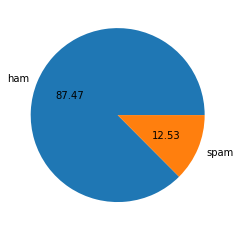

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adithya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
# description
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.443734,1.959713
std,58.153491,13.325627,1.432020
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

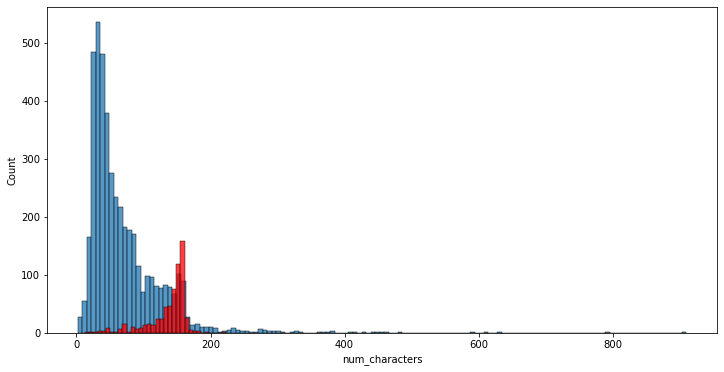

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

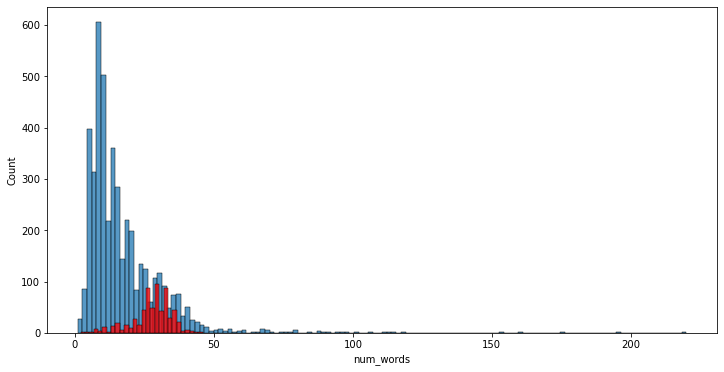

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

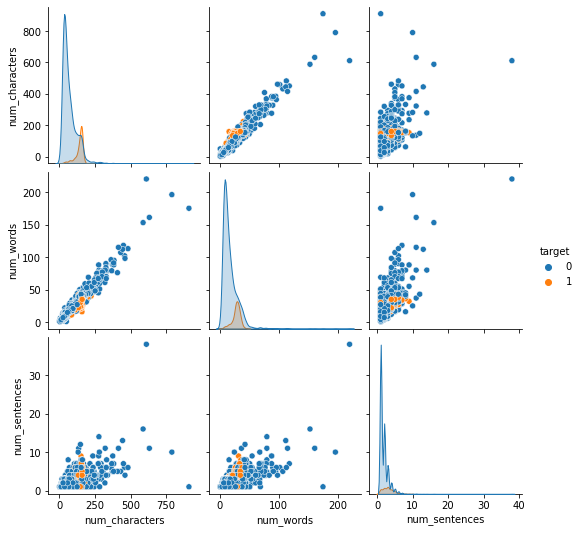

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

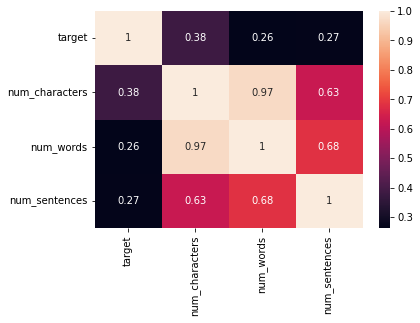

In [38]:
#correlations
sns.heatmap(df.corr(),annot=True)

# 3. Data preprocessing
1. lower case
2. Tokenization
3. Remove special characters
4. Remove stop words and punctuation
5. Stemming


In [70]:
!pip install nltk
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stopwords.words('english')
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adithya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    #removing special symobols and only using alpha_num
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    #removing stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    #stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [75]:
#removing stemming, useless repeating words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [77]:
transform_text('Hello, this is %% Adithya and I am learning ML')

'hello adithya learn ml'

In [78]:
df['transformed_text'] = df['text'].apply(transform_text)

In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## What are word clouds?
A word cloud is a form of visual representation. It is a grouping of words that are displayed in various sizes: the larger and bolder the term, the more frequently it appears in a document and the more important it is. 

In [82]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [85]:
#checking a wordcloud for spam msgs
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

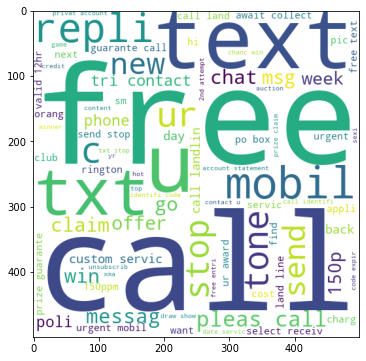

In [86]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [87]:
#checking a wordcloud for non-spam msgs
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

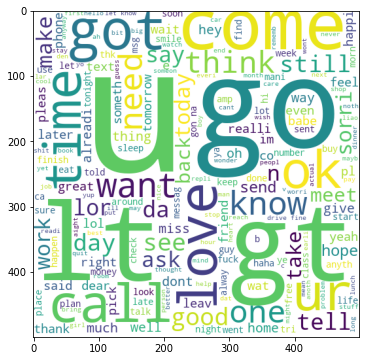

In [88]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [89]:
#seperating all spam words into a list
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [90]:
len(spam_corpus)

9861

In [91]:
#converting to a dictionary
from collections import Counter
Counter(spam_corpus)

Counter({'free': 188,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 46,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 30,
         'question': 9,
         'std': 6,
         'txt': 140,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 59,
         'rcv': 2,
         'winner': 13,
         'valu': 7,
         'network': 26,
         'custom': 40,
         'select': 26,
         'receivea': 1,
         'prize': 80,
         'reward': 7,
         'claim': 97,
         'cal

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


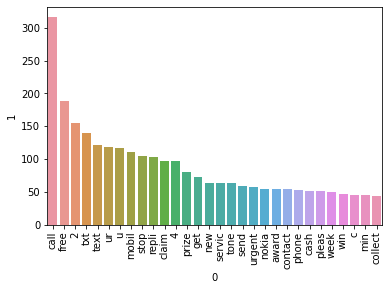

In [92]:
#ploting the top 30 spam words
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [94]:
#non spam
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [95]:
len(ham_corpus)

35304

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


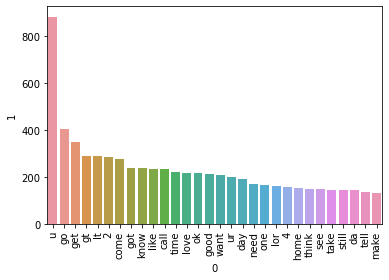

In [96]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [122]:
# we'll have to vectorize
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [151]:
#sparse df -> dense
X = cv.fit_transform(df['transformed_text']).toarray()

In [152]:
X.shape
#6678 words from 5163 words

(5163, 6678)

In [106]:
y = df['target'].values

In [108]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
#splitting data into test and train(no CV)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### We're using Naive Bayes theorum
learn more here **https://www.geeksforgeeks.org/naive-bayes-classifiers/**

In [114]:
#high presicion model, so reduction of false positives is imp
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [115]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [116]:
#GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8664085188770572
[[787 125]
 [ 13 108]]
0.463519313304721


Gaussian Naive Bayes is performing very bad

In [117]:
#MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757986447241046
[[899  13]
 [ 12 109]]
0.8934426229508197


Multinomial Naive Bayes is a bit better with higher accuracy

In [118]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9690222652468539
[[908   4]
 [ 28  93]]
0.9587628865979382


Bernolli Naive has the best precision score above

#### Lets use another approach to vectorize text
Instead of count vectorizer which just gives 1 and 0 as count lets used tf-idf which also gives the weight of words in the overall document
here is an example
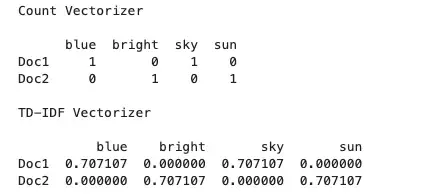
**learn more** - **https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a**

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [154]:
X_2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [155]:
X_2.shape

(5163, 3000)

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X_2,y,test_size=0.2,random_state=2)

In [128]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.861568247821878
[[784 128]
 [ 15 106]]
0.452991452991453


In [129]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9719264278799613
[[911   1]
 [ 28  93]]
0.9893617021276596


In [130]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.978702807357212
[[909   3]
 [ 19 102]]
0.9714285714285714


### MNB is doing the best here

In [132]:
!pip3 install xgboost

In [135]:
#lets test all classification algorithms and see what is doing best
from sklearn.linear_model import LogisticRegression
#support vector classification
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [136]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
# get all the values to a dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [138]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [139]:
#training all the algorithms 
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.978702807357212
Precision -  0.9805825242718447
For  KN
Accuracy -  0.9215876089060987
Precision -  1.0
For  NB
Accuracy -  0.9719264278799613
Precision -  0.9893617021276596
For  DT
Accuracy -  0.9351403678606002
Precision -  0.8068181818181818
For  LR
Accuracy -  0.9554695062923524
Precision -  0.9310344827586207
For  RF
Accuracy -  0.972894482090997
Precision -  0.979381443298969
For  AdaBoost
Accuracy -  0.9622458857696031
Precision -  0.9270833333333334
For  BgC
Accuracy -  0.9641819941916747
Precision -  0.868421052631579
For  ETC
Accuracy -  0.9777347531461762
Precision -  0.9803921568627451
For  GBDT
Accuracy -  0.9535333978702807
Precision -  0.9397590361445783
For  xgb
Accuracy -  0.9622458857696031
Precision -  0.91


In [140]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [141]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.921588,1.000000
2,NB,0.971926,0.989362
0,SVC,0.978703,0.980583
8,ETC,0.977735,0.980392
5,RF,0.972894,0.979381
9,GBDT,0.953533,0.939759
4,LR,0.955470,0.931034
6,AdaBoost,0.962246,0.927083
10,xgb,0.962246,0.910000
7,BgC,0.964182,0.868421


### Naive Bayes is doing the best with accuracy and precision


## Let's try Voting Classifier

**A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.**
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

### Hard Voting:
In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
### Soft Voting:
In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

**learn more** - **https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/**

In [157]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
knc = KNeighborsClassifier()

from sklearn.ensemble import VotingClassifier

In [158]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('kn', knc)])

In [159]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('kn', KNeighborsClassifier())])

In [160]:
#hard voting
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748305905130688
Precision 1.0


In [148]:
#soft voting
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9719264278799613
Precision 0.9893617021276596


## Hard voting seems to best till now
Lets train it.

In [161]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))